In [24]:
import numpy as np
import pandas as pd
import nltk

import warnings
warnings.filterwarnings('ignore')

In [25]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [26]:
import bs4 as bs
import re
import urllib.request
import nltk

scrapped_data = urllib.request.urlopen('https://en.wikipedia.org/wiki/Breaking_Bad')
article = scrapped_data.read()

parsed_article = bs.BeautifulSoup(article,'lxml')

paragraphs = parsed_article.find_all('p')

article_text = ""

for p in paragraphs:
    article_text += p.text

In [27]:
scrapped_data_1 = urllib.request.urlopen('https://breakingbad.fandom.com/wiki/Walter_White')
article_1 = scrapped_data_1.read()

parsed_article_1 = bs.BeautifulSoup(article_1,'lxml')

paragraphs_1 = parsed_article_1.find_all('p')

article_text_1 = ""

for p in paragraphs_1:
    article_text_1 += p.text

In [28]:
processed_article_1 = article_text_1.lower()
processed_article_1 = re.sub('[^a-zA-Z]', ' ', processed_article_1 )
processed_article_1 = re.sub(r'\s+', ' ', processed_article_1)

all_sentences_1 = nltk.sent_tokenize(processed_article_1)

all_words_1 = [nltk.word_tokenize(sent) for sent in all_sentences_1]


from nltk.corpus import stopwords
for i in range(1):
    all_words_1[i] = [w for w in all_words_1[i] if w not in stopwords.words('english')]

In [29]:
processed_article = article_text.lower()
processed_article = re.sub('[^a-zA-Z]', ' ', processed_article )
processed_article = re.sub(r'\s+', ' ', processed_article)

all_sentences = nltk.sent_tokenize(processed_article)

all_words = [nltk.word_tokenize(sent) for sent in all_sentences]


from nltk.corpus import stopwords
for i in range(1):
    all_words[i] = [w for w in all_words[i] if w not in stopwords.words('english')]

In [30]:
text = []

In [31]:
size = 0
vocab = []
for word in all_words[0]:
    text.append(word)
    t = 0
    for v in range(len(vocab)):
        if vocab[v] == word:
            t = 1
            break
    if t == 0:
        vocab.append(word)
        size += 1

# for word in all_words_1[0]:
#     text.append(word)
#     t = 0
#     for v in range(len(vocab)):
#         if vocab[v] == word:
#             t = 1
#             break
#     if t == 0:
#         vocab.append(word)
#         size += 1

In [32]:
len(text)

5422

In [33]:
len(vocab)

2259

In [34]:
v = np.random.uniform(-0.6, 0.6, (len(vocab), 300))
u = np.random.uniform(-0.6, 0.6, (len(vocab), 300))

In [35]:
u

array([[-0.23630033, -0.15675792,  0.36635699, ...,  0.59900045,
         0.1501736 , -0.59808156],
       [-0.15508554,  0.2253513 ,  0.39244353, ...,  0.55289107,
         0.4806543 , -0.50649284],
       [-0.28617611, -0.23699402, -0.52596523, ...,  0.38208602,
         0.16585043, -0.49222717],
       ...,
       [-0.0829587 , -0.26076001, -0.43760858, ...,  0.07631013,
         0.08449221, -0.23748645],
       [ 0.28945517,  0.35524737, -0.4826425 , ..., -0.19795327,
         0.3706586 , -0.31782826],
       [ 0.05967098, -0.09158976, -0.26759794, ...,  0.10361357,
         0.18976884, -0.58755252]])

In [36]:
iterations = 50
learning_rate = 0.07
beta = 0.01

In [37]:
def grad(central_vec, index_context, context):
    exponents = []
    sum_exp_dot_cont = 0

    for word_vec in context:
        temp = np.exp(np.dot(word_vec.transpose(), central_vec))
        exponents.append(temp)
        sum_exp_dot_cont += temp * word_vec

    sum_exp = np.sum(exponents)
    grad_central_vec = (1 / sum_exp) * sum_exp_dot_cont - context[index_context]
    # print(grad_central_vec.shape)

    grad_cont_vec = []

    for i in range(5):
        grad_cont_vec.append((1 / sum_exp) * np.exp(np.dot(context[i], central_vec)) * central_vec)
    
    grad_cont_vec[index_context] += -central_vec
    grad_cont_vec = np.array(grad_cont_vec)
    # print(grad_cont_vec)

    return grad_central_vec, grad_cont_vec

In [38]:
for iteration in range(iterations):
    print(iteration)
    # print(v)
    for i in range(3, len(text) - 3): # выбираем слово из текста
                
        for k in range(len(vocab)): # ищем в словаре позицию central слово
            if text[i] == vocab[k]:
                pos_central = k
                break


        for j in range(1, 3): # context на два слова вперёд
            # print(text[i + j])
            for k in range(len(vocab)): # ищем в словаре позицию context слово
                if text[i + j] == vocab[k]:
                    pos_context = k
                    break
            
            rand = np.random.randint(len(vocab), size=5)
            rand[4] = pos_context

            u_temp = []
            for k in range(len(rand)):
                u_temp.append(u[rand[k]])
                #print(vocab[rand[k]])

            #print('---')
            grad_center_vec, grad_outside_vecs = grad(v[pos_central], 4, u_temp)

            v[pos_central] -= learning_rate * grad_center_vec + 2 * beta * v[pos_central] # grad + reg

            for k in range(len(rand)):
                u[rand[k]] -= learning_rate * grad_outside_vecs[k] + 2 * beta * u[rand[k]]
                
        
        for j in range(1, 3): # context на два слова вперёд
            for k in range(len(vocab)): # ищем в словаре позицию context слово
                if text[i - j] == vocab[k]:
                    pos_context = k
                    break
                    
            rand = np.random.randint(len(vocab), size=5)
            rand[4] = pos_context
            flag = 0
            
            u_temp = []
            for k in range(len(rand)):
                u_temp.append(u[rand[k]])
                #print(vocab[rand[k]])

            #print('---')

            grad_center_vec, grad_outside_vecs = grad(v[pos_central], 4, u_temp)

            v[pos_central] -= learning_rate * grad_center_vec + 2 * beta * v[pos_central] # grad + reg

            for k in range(len(rand)):
                u[rand[k]] -= learning_rate * grad_outside_vecs[k] + 2 * beta * u[rand[k]]
                # print(u[rand[k]], vocab[k])
            

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


In [47]:
from scipy.spatial import distance
most_similar = []
central = 40
ms = []


most_similar_1 = []
central_1 = 17
ms_1 = []

x_2 = []
y_2 = []

x_walt = []
y_walt = []

for j in range(len(vocab)):
    if j != central:
        dist = distance.euclidean(v[central], v[j])
        most_similar.append([dist, j, np.sum(v[j][0:49]), np.sum(v[j][50:100])])
    if j == central:
        x_2.append(np.sum(v[j][0:49]))
        y_2.append(np.sum(v[j][50:100]))

    if j != central_1:
        dist = distance.euclidean(v[central_1], v[j])
        most_similar_1.append([dist, j, np.sum(v[j][0:49]), np.sum(v[j][50:100])])

    if j == central_1:
        x_walt.append(np.sum(v[j][0:49]))
        y_walt.append(np.sum(v[j][50:100]))

# most_similar = np.sort(most_similar)
# print('pos -', pos, ' ', 'dist -', most_similar[0], ' ', 'cont -', vocab[cent],' ', 'word -', vocab[pos])

In [48]:
from operator import itemgetter

most_similar = sorted(most_similar, key=itemgetter(0))
most_similar_1 = sorted(most_similar_1, key=itemgetter(0))

In [49]:
for i in range(30):
    print(vocab[most_similar_1[i][1]])

cancer
would
says
use
white
physically
man
interview
feels
rest
successful
instead
brought
matter
lung
state
new
meeting
shift
live
odenkirk
whether
eventually
much
telling
past
sentence
became
chooses
walt


In [50]:
for i in range(30):
    print(vocab[most_similar[i][1]])

becomes
skyler
capture
gives
turns
cooking
meth
hank
seems
gus
provide
job
leave
lydia
drug
mike
hector
take
become
protect
criminal
father
keep
odds
earnings
family
money
killing
launder
dean


In [51]:
x = []
y = []
for i in range(2000):
    x.append(most_similar[i][2])
    y.append(most_similar[i][3])


x_1 = []
y_1 = []
for i in range(2000):
    x_1.append(most_similar_1[i][2])
    y_1.append(most_similar_1[i][3])

In [52]:
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe
import seaborn as sns
plt.style.use('default')
sns.set(rc={'figure.figsize':(8, 6)})
sns.set_style('white')
sns.despine()

<Figure size 800x600 with 0 Axes>

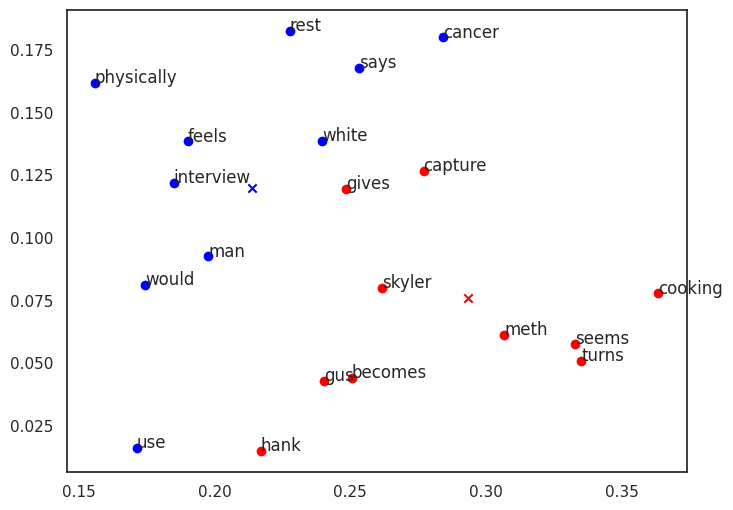

In [53]:
for i in range(len(most_similar)):
    if i == 10:
        break
    plt.annotate(vocab[most_similar[i][1]], (x[i], y[i]))
    plt.scatter(x[i], y[i], color='red')

for i in range(len(most_similar_1)):
    if i == 10:
        break
    plt.annotate(vocab[most_similar_1[i][1]], (x_1[i], y_1[i]))
    plt.scatter(x_1[i], y_1[i], color='blue')

plt.scatter(x_walt, y_walt, color='blue', marker="x")

plt.scatter(x_2, y_2, color='red', marker="x")

plt.show()

In [46]:
for i in range(len(vocab)):
    if vocab[i] == 'gus':
        print(i)
        break

107
